# 10강 선그래프


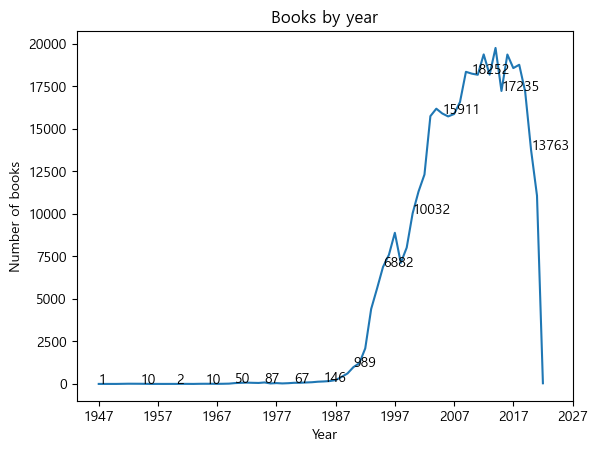

In [4]:
import matplotlib.pyplot as plt
import pandas as pd 

book = pd.read_csv('서울특별시교육청남산도서관 장서 대출목록 (2022년 01월).csv', encoding='euc-kr',low_memory=False)
year_book = book.copy()

# str.contains 메서드로 발행년도에 문자열 포함된 행 확인하기
invalid_num = year_book['발행년도'].str.contains('\D',na=True)
year_book[invalid_num]

# 문자열 섞였거나 숫자가 4개 보다 많은경우 맨 앞의 숫자 4개만 남겨두고 나머지는 없애기
year_book['발행년도']=year_book['발행년도'].str.extract(r'(\d{4})', expand=False)

# 확인하기
'''
# 발행년도가 숫자 4개와 match되지 않는경우 false로 바꾼 행
new_num = year_book['발행년도'].str.match(r'\d{4}',na=False)
year_book[new_num==False].count() # 0
'''

year_book= year_book[['도서명','저자','출판사','발행년도']]

# '발행년도' 열을 숫자로 변환하여 새로운 열에 저장
year_book['발행년도'] = pd.to_numeric(year_book['발행년도'], errors='coerce')

# '발행년도' 열에서 NaN 값 제거 (옵션)
year_book.dropna(subset=['발행년도'], inplace=True)

# 정수형 변환
year_book['발행년도'] = year_book['발행년도'].astype(int)

# 1800년과 2022년 사이의 데이터만 남기기
year_book = year_book[(year_book['발행년도'] >= 1947) & (year_book['발행년도'] <= 2022)]


# 연도별 책의 수 계산
count_by_year = year_book.groupby('발행년도').size()

# 그래프 그리기
plt.plot(count_by_year.index, count_by_year.values)
# plt.plot(count_by_year, linestyle=':', color='red') # 라인스타일 바꾸기 
# plt.plot(count_by_year, '*-g') # 축약하기: 마커*, 선-,색green

# 숫자 출력하기
plt.xticks(range(1947, 2030, 10)) # x축 설정
for idx, val in count_by_year[::5].items(): #5년 단위로 value값 기입
    # 텍스트위치 지정 가능 
    plt.annotate(val,(idx,val))
plt.title('Books by year')
plt.xlabel('Year')
plt.ylabel('Number of books')
plt.show()


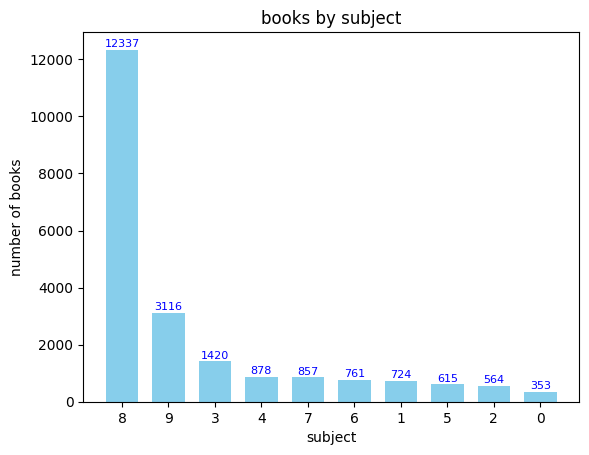

In [45]:
# 막대 그래프

import matplotlib.pyplot as plt
import pandas as pd 

book = pd.read_csv('서울특별시교육청남산도서관 장서 대출목록 (2022년 01월).csv', encoding='euc-kr',low_memory=False)
subject_book = book.copy()
# nan 값 있는 열과 행 없애기 
subject_book = subject_book.dropna(axis=1, how='all')
subject_book = subject_book.dropna()

subject_book['주제분류번호'].sort_values()
# 주제분류 번호를 0부터 9까지의카테고리로 나눌것

# '주제분류번호' 의 수를 맨 앞자리 수 한개만 남기기 
subject_book['주제분류번호']=subject_book['주제분류번호'].str.extract(r'(\d{1})', expand=False)

# 값에 따라 내림차순 정렬

# '주제분류번호'기준으로 묶은 뒤 해당 size로 그래프 그리기
count_by_subject = subject_book.groupby('주제분류번호').size()
count_by_subject = count_by_subject.sort_values(ascending=False) # 그룹크기 큰 순서

plt.bar(count_by_subject.index, count_by_subject.values,
         width=0.7, color='skyblue') # wicth:막대사이 간격

plt.title('books by subject')
plt.xlabel('subject')
plt.ylabel('number of books')
for idx, val in count_by_subject.items():
    plt.annotate(val, (idx, val), xytext=(0,2), textcoords='offset points'
                 , fontsize=8, ha='center',color='blue') # ha: 가운데 정렬 

# 가로 막대 그래프 그리기
'''
plt.bar(count_by_subject.values, count_by_subject.index, 
         height=0.7, color='skyblue')
for idx, val in count_by_subject.items():
    plt.annotate(val, (idx, val), xytext=(0,2), textcoords='offset points'
                 , fontsize=8, va='center',color='blue')

'''

# 11강: 객제지향 API로 그래프

In [5]:
import matplotlib.pyplot as plt
import pandas as pd 

book = pd.read_csv('서울특별시교육청남산도서관 장서 대출목록 (2022년 01월).csv', encoding='euc-kr',low_memory=False)

C:\Users\uann9\AppData\Local\Temp\ipykernel_32804\2543119628.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


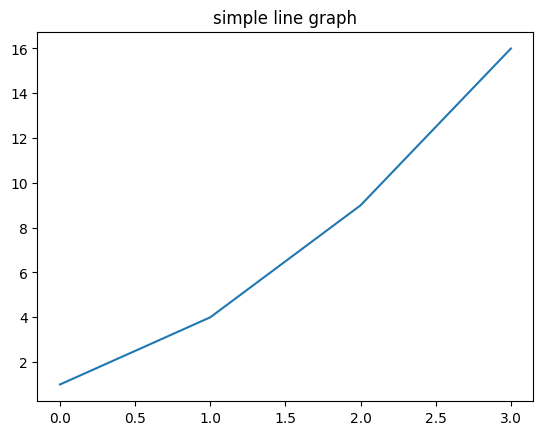

In [3]:
# pyplot 방식
plt.plot([1,4,9,16]) # 이경우 x축 값은 인덱스 값 
plt.title('simple line graph')
plt.show()

C:\Users\uann9\AppData\Local\Temp\ipykernel_29220\1175139595.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


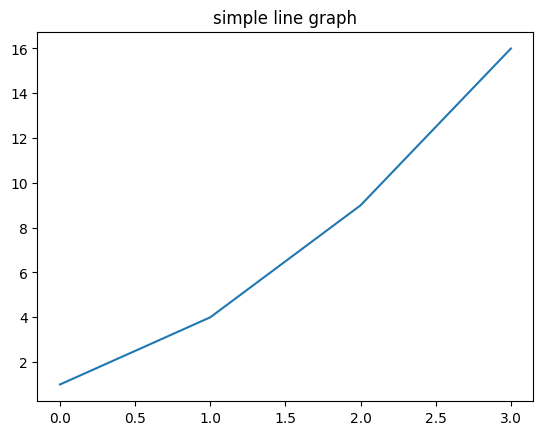

In [4]:
# 객체지향 API 방식
fig, ax = plt.subplots() # fig 와ax 객체 만ㄷ름
ax.plot([1,4,9,16])
ax.set_title('simple line graph') # set_이름이 됨 
fig.show()

In [1]:
# 발행년도 vs 출판사 산점도 그리기
fig, ax = plt.subplots(figsize=(10,8))


# 산점도 x축 값은 문자열이 들어올 수 없음 
sc = ax.scatter(book['발행년도'],book['출판사'],
            linewidths=0.5, # 마커 테두리 선 너비 조정 
            edgecolors='k', # 마커 테두리를 블랙 
            alpha=0.3, # 마커 투명도
            cmap='jet', # 컬러 맵
            s=book['대출건수'], # s= 대출건수에 따라 마커 크기 크게 하는 변수
            c=book['대출건수'] # c= 마커 색상설정
            )
fig.colorbar(sc) # 컬러바 메서드에 전달하면 컬러바 그래프 같이 보임

NameError: name 'year_book' is not defined